In [1]:
#@title Librerias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

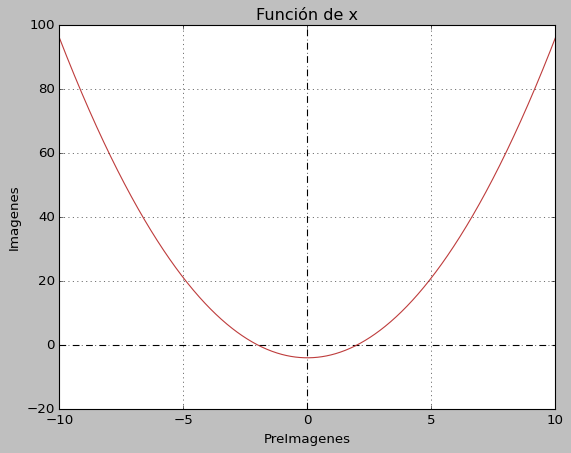

Nuestra raiz #1 esperada es de: -1.999999999985837 (Aproximadamente -2)
Nuestra raiz #2 esperada es de: 1.999999999985837 (Aproximadamente 2)


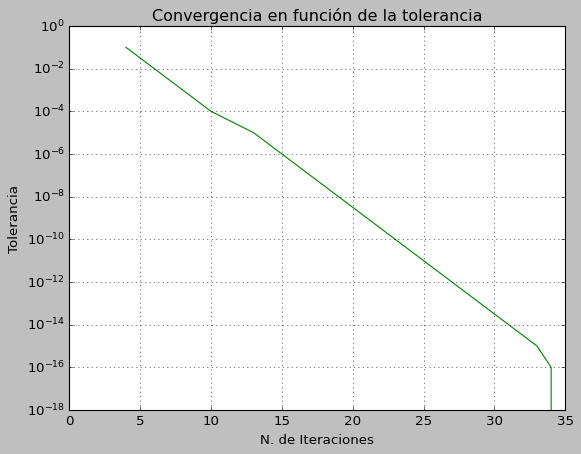

Observamos como entre mas aumenta la tolerancia mas iteraciones son necesarias
Hasta que llega el epsilon de la maquina donde no puede aumentar mas la tolerancia por lo que se observa como crea una linea vertical


In [89]:
#Problema #1

#Punto #1-----------------------------------

"""
-La función f(x)-

Datos de entrada:
x = Preimagenes

Datos de salida:
y = Las imagenes

"""

def Cuadratica(x):
    return x**2 - 4
#-------------------------------------------

"""
-Con la tolerancia y el maximo de iteraciones fijos-
-La función Falsi(x)-

Datos de entrada:
a = Punto #1
b = Punto #2

Datos de salida:
c = Punto donde se encuentra la raiz
i = Numero de iteraciones

"""

def Falsi(a,b, f = Cuadratica , tol = 1e-10, maxiter = 100):
    if f(a)  == 0:
        return a
    elif f(b) == 0:
        return b
    for i in range(1,maxiter+1):
        if f(a) * f(b) < 0:
            c = (a*f(b) - b*f(a))/(f(b)-f(a))
            if abs(f(c)) < tol:
                return c , i
            elif f(a) * f(c) > 0:
                a = c
            else:
                b = c
    return "ITERACIONES MAXIMAS - DIVERGENCIA"

#-------------------------------------------

x = np.linspace(-10,10,1000)

plt.style.use("classic")

plt.title("Función de x")

plt.xlabel("PreImagenes")
plt.ylabel("Imagenes")

plt.axhline( 0 , ls = "--" , color="black")
plt.axvline( 0 , ls = "--" , color="black")
plt.plot( x , Cuadratica(x) , color = "#BE3C3C")

plt.grid()
plt.show()

#-------------------------------------------

a_1 = -4
b_1 = -1
a_2 = 4
b_2 = 1
print("Nuestra raiz #1 esperada es de:",Falsi(a_1,b_1)[0],"(Aproximadamente -2)")
print("Nuestra raiz #2 esperada es de:",Falsi(a_2,b_2)[0],"(Aproximadamente 2)")

#Punto #2-----------------------------------

Tols = np.logspace(-1, -18, 18)
Iter = []

for n in Tols:
    Iter.append(Falsi( a_2 , b_2 , tol = n)[1])

#-------------------------------------------

plt.title("Convergencia en función de la tolerancia")

plt.xlabel("N. de Iteraciones")
plt.ylabel("Tolerancia")

plt.yscale("log")

plt.plot(Iter , Tols , color="green")

plt.grid()
plt.show()

#-------------------------------------------

print("Observamos como entre mas aumenta la tolerancia mas iteraciones son necesarias\nHasta que llega el epsilon de la maquina donde no puede aumentar mas la tolerancia por lo que se observa como crea una linea vertical")

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

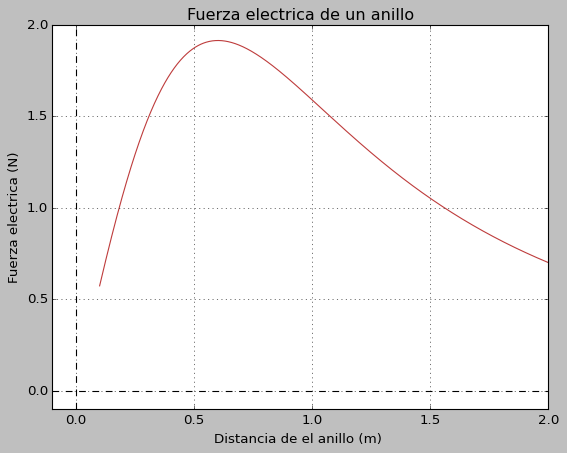

La fuerza electrica iguala a 1.5N en dos distancias distintas como se ve la grafica, las cuales son:

La distancia #1 por el metodo de Newton es de aproximadamente 0.23944925515391982 metros,
Y por el metodo de biseccion es de aproximadamente 0.23944925515424983 metros.

La distancia #2 por el metodo de Newton es de aproximadamente 1.2973739416888905 metros,
Y por el metodo de biseccion es de aproximadamente 1.297373941689511 metros.

Con los dos metodos obtenemos resultados correspondientes al grafico.


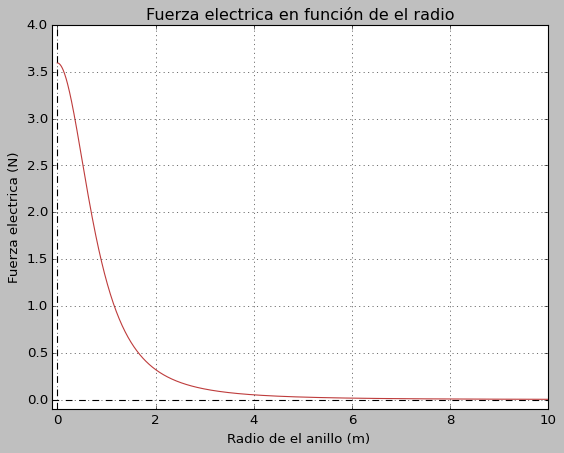

Observamos como la fuerza electrica va disminuyendo a medida que el radio aumenta,
esto debido a que las cargas de la anilla se van alejando mas de nuestra carga puntual.


In [ ]:
#Problema 2

#Punto #1-----------------------------------

"""
-Tomando las cargas fijas-
-En la funcion definida como fe(x,r)-

Los datos de ingreso son:

x = La distancia al anillo
r = El radio del anillo

Los datos de salida son:

Fe = La fuerza electrica
"""

def fe(x , r , q=2*1e-5 , Q=2*1e-5):
    return (1/(4*np.pi*8.8541878188e-12))*((q*Q*x)/(x**2+r**2)**(3/2))

#Punto #2-----------------------------------

x = np.linspace(0.1,2,1000)   #Distancia de el anillo
a = 0.85    #Radio fijo de el anillo

#-------------------------------------------

plt.style.use("classic")

plt.title("Fuerza electrica de un anillo")

plt.xlabel("Distancia de el anillo (m) ")
plt.ylabel("Fuerza electrica (N)")

plt.xlim(-0.1,2)
plt.ylim(-0.1,2)
plt.axhline( 0 , ls = "--" , color="black")
plt.axvline( 0 , ls = "--" , color="black")

plt.plot( x , fe(x,a) , color = "#BE3C3C")

plt.grid()
plt.show()

#Punto #3-----------------------------------

"""
-Tomando las cargas fijas-
-En la funcion definida como fe_r(x,r)-

Los datos de ingreso son:

x = La distancia al anillo
r = El radio del anillo

Los datos de salida son:

Fe = La fuerza electrica
"""

def fe_r(x , r = a , q=2*1e-5 , Q=2*1e-5):
    return (1/(4*np.pi*8.8541878188e-12))*((q*Q*x)/(x**2+r**2)**(3/2)) - 1.25

#-------------------------------------------

NRaiz = sc.optimize.newton( fe_r , x0 = 0 )
NRaiz_2 = sc.optimize.newton( fe_r , x0 = 1 )
BRaiz = sc.optimize.bisect( fe_r , 0.2 , 0.5)
BRaiz_2 = sc.optimize.bisect( fe_r , 1 , 1.3 )

#-------------------------------------------

print("La fuerza electrica iguala a 1.5N en dos distancias distintas como se ve la grafica, las cuales son:\n")
print("La distancia #1 por el metodo de Newton es de aproximadamente",NRaiz,"metros,\nY por el metodo de biseccion es de aproximadamente",BRaiz,"metros.\n")
print("La distancia #2 por el metodo de Newton es de aproximadamente",NRaiz_2,"metros,\nY por el metodo de biseccion es de aproximadamente",BRaiz_2,"metros.\n")
print("Con los dos metodos obtenemos resultados correspondientes al grafico.")

#Punto #4-----------------------------------

x0 = 1  #Distancia fija a el anillo

b = np.linspace(0,10,1000)      #Radio de la anilla

Fes = fe(x0 , b)    #Fuerza electrica en función de el radio

#-------------------------------------------

plt.style.use("classic")

plt.title("Fuerza electrica en función de el radio")

plt.xlabel("Radio de el anillo (m) ")
plt.ylabel("Fuerza electrica (N)")

plt.xlim(-0.1,10)
plt.ylim(-0.1,4)
plt.axhline( 0 , ls = "--" , color="black")
plt.axvline( 0 , ls = "--" , color="black")

plt.plot( b , Fes , color = "#BE3C3C")

plt.grid()
plt.show()

#-------------------------------------------

print("Observamos como la fuerza electrica va disminuyendo a medida que el radio aumenta,\nesto debido a que las cargas de la anilla se van alejando mas de nuestra carga puntual.")


# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



C:\Users\Orly Rivera Cruz\AppData\Local\Temp\ipykernel_4716\80644449.py:22: RuntimeWarning: invalid value encountered in log
  return ( u * np.log( (m0) / (m0 - q*t)) ) - (g*t)


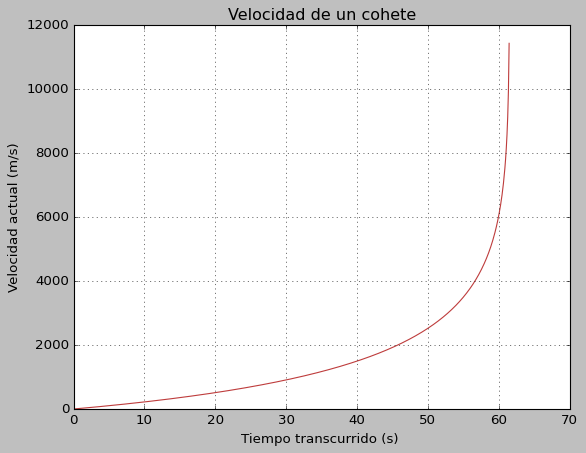

Podemos ver graficamente la funcion se trunca como por t = 60s por las limitaciones algebraicas de el logaritmo


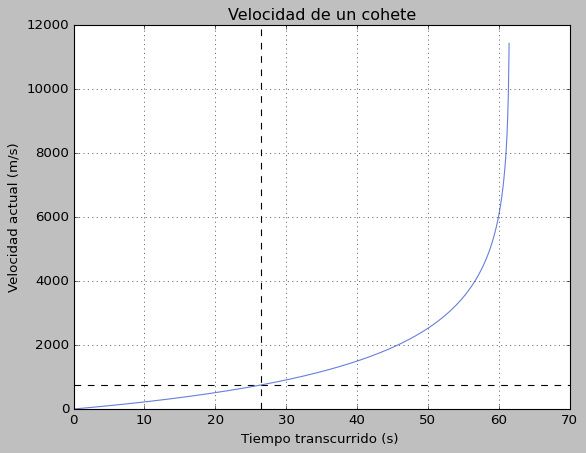

La velocidad de el cohete iguala a 750m/s cuando:

El tiempo transcurrido por el metodo de Newton es de aproximadamente 26.40784795596704 segundos
Por el metodo de biseccion es de aproximadamente 26.40784795596744 segundos.
Por el metodo de Falsi es de aproximadamente 26.40784795596637 segundos.

Con los tres metodos obtenemos resultados correspondientes al grafico.


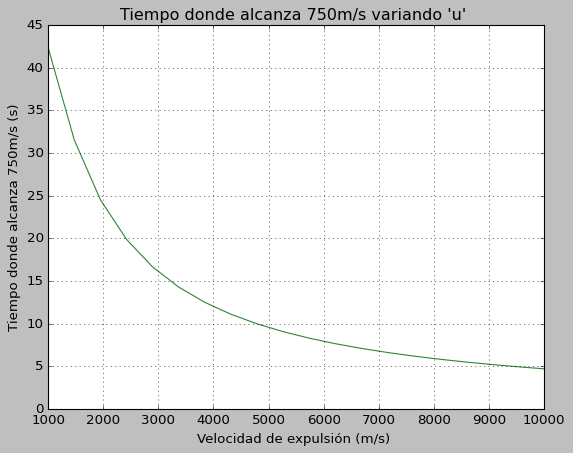

 Observamos como mientras aumenta la velocidad de expulsión el tiempo para alcanzar 750m/s
 se vuelve cada vez mas pequeño lo que concuerda con la intuición de entre mas rapido se
 expulse mas velocidad ganara el cohete por lo que llegara mas rapido.


In [108]:
#Problema 3

#Punto #1-----------------------------------

"""
-En la funcion definida como vc( t , m0 , q , u )-

Los datos de ingreso son:

t = Tiempo transcurrido
m0 = Masa inicial de el cohete
q = Consumo de combustible
u = Velocidad al a que se expulsa el combustible

Los datos de salida son:

vc = Velocidad actual de el cohete
"""
g = 9.81

def vc( t , m0 , q , u ):
    return ( u * np.log( (m0) / (m0 - q*t)) ) - (g*t)

#Punto #2-----------------------------------

t = np.linspace(0,100,1000)   #Tiempo transcurrido
m0 = 1.6e5  #Masa inicial fija
u = 1800    #Velocidad de expulsion fija
q = 2600    #Consumo de combustible fijo

#-------------------------------------------

plt.style.use("classic")

plt.title("Velocidad de un cohete")

plt.xlabel("Tiempo transcurrido (s) ")
plt.ylabel("Velocidad actual (m/s)")

plt.plot( t , vc( t , m0 = m0 , q = q ,  u = u) , color = "#BE3C3C")

plt.grid()
plt.show()

#-------------------------------------------

print("Podemos ver graficamente la funcion se trunca como por t = 60s por las limitaciones algebraicas de el logaritmo")


#Punto #3-----------------------------------

"""
-En la funcion definida como vc_750( t , m0 , q , u )-

Los datos de ingreso son:

t = Tiempo transcurrido 
m0 = Masa inicial de el cohete
q = Consumo de combustible
u = Velocidad al a que se expulsa el combustible

Los datos de salida son:

vc = Velocidad actual de el cohete
"""

def vc_750( t , m0 = m0 , q = q, u = u):
    return ( u * np.log( (m0) / (m0 - q*t)) ) - (g*t) - 750

#-------------------------------------------

plt.title("Velocidad de un cohete")

plt.xlabel("Tiempo transcurrido (s) ")
plt.ylabel("Velocidad actual (m/s)")

plt.axhline( 750 , ls = "--" , color="black")
plt.axvline( NRaiz , ls = "--" , color="black")

plt.plot( t , vc( t , m0 = m0 , q = q ,  u = u) , color = "#697EDA")

plt.grid()
plt.show()

#-------------------------------------------

NRaiz = sc.optimize.newton( vc_750 , x0 = 25 )
BRaiz = sc.optimize.bisect( vc_750 , 10 , 40)
FRaiz = Falsi( 10 , 40 , f = vc_750)[0]

#-------------------------------------------

print("La velocidad de el cohete iguala a 750m/s cuando:\n")
print("El tiempo transcurrido por el metodo de Newton es de aproximadamente",NRaiz,"segundos")
print("Por el metodo de biseccion es de aproximadamente",BRaiz,"segundos.")
print("Por el metodo de Falsi es de aproximadamente",FRaiz,"segundos.\n")
print("Con los tres metodos obtenemos resultados correspondientes al grafico.")

#Punto #4-----------------------------------

us = np.linspace(1000,10000,20)      #Velocidades de expulsión

Tiempos = []
Fes = fe(x0 , b)    #Fuerza electrica en función de el radio

for n in us:
    def vc_u( t , m0 = m0 , q = q, u = n):
        return ( u * np.log( (m0) / (m0 - q*t)) ) - (g*t) - 750
    Tiempos.append(sc.optimize.newton( vc_u , x0 = 25 ))

#-------------------------------------------

plt.style.use("classic")

plt.title("Tiempo donde alcanza 750m/s variando 'u' ")

plt.xlabel("Velocidad de expulsión (m/s) ")
plt.ylabel("Tiempo donde alcanza 750m/s (s)")

plt.xlim(1000,10000)
plt.ylim(0,45)

plt.plot( us , Tiempos , color = "#2F8536")

plt.grid()
plt.show()

#-------------------------------------------

print(" Observamos como mientras aumenta la velocidad de expulsión el tiempo para alcanzar 750m/s\n se vuelve cada vez mas pequeño lo que concuerda con la intuición de entre mas rapido se\n expulse mas velocidad ganara el cohete por lo que llegara mas rapido.")

